In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

import joblib
import pickle


In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [6]:
data.workclass.replace({'?':'Others'},inplace=True)
data['workclass'].value_counts()

C:\Users\RUPAM MONDAL\AppData\Local\Temp\ipykernel_4912\3423645516.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [8]:
data.occupation.replace({'?':'Others'},inplace=True)
data['occupation'].value_counts()

C:\Users\RUPAM MONDAL\AppData\Local\Temp\ipykernel_4912\1451463520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [9]:
data['native-country'].replace({'?':'Others'},inplace=True)
data['native-country'].value_counts()

C:\Users\RUPAM MONDAL\AppData\Local\Temp\ipykernel_4912\3752757567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace({'?':'Others'},inplace=True)


native-country
United-States                 43832
Mexico                          951
Others                          857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [10]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [11]:
data.relationship.value_counts()

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64

In [12]:
data.gender.value_counts()

gender
Male      32629
Female    16182
Name: count, dtype: int64

In [13]:
data.shape

(48811, 15)

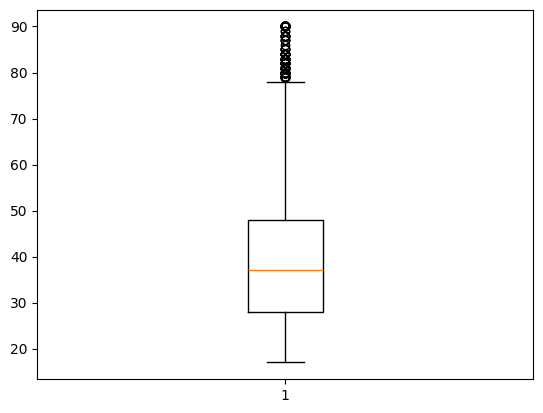

In [14]:
plt.boxplot(data['age'])
plt.show()

In [15]:
data=data[(data['age']<=75)&(data['age']>=17)]

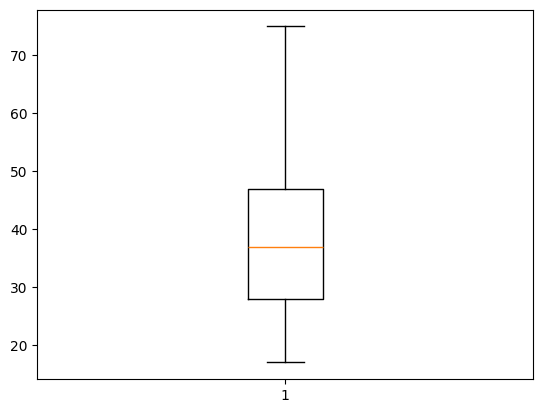

In [16]:
plt.boxplot(data['age'])
plt.show()

In [17]:
data.shape

(48438, 15)

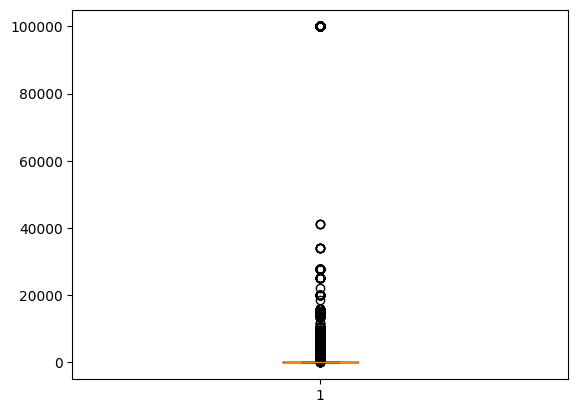

In [18]:
plt.boxplot(data['capital-gain'])
plt.show()

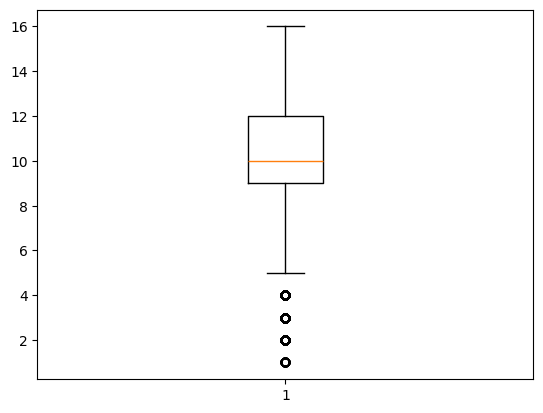

In [19]:
plt.boxplot(data['educational-num'])
plt.show()

In [20]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

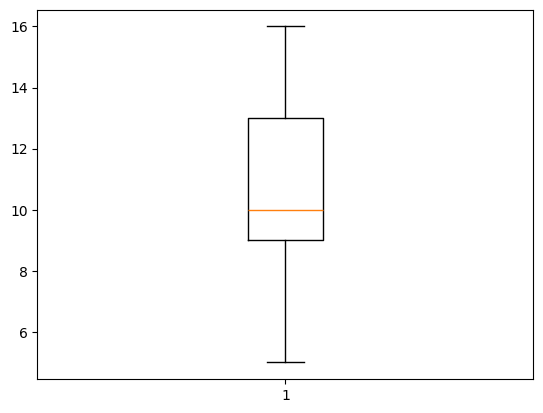

In [21]:
plt.boxplot(data['educational-num'])
plt.show()

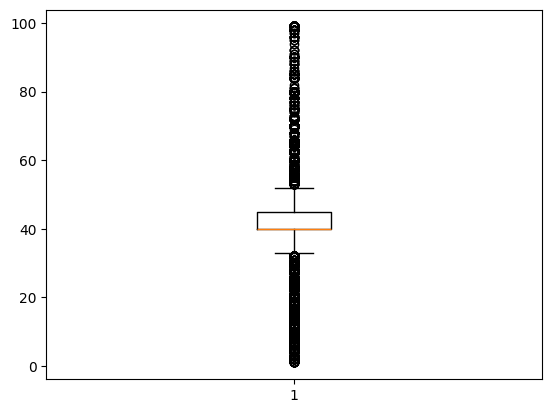

In [22]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [23]:
data=data.drop(columns=['education']) #redundant features removal

In [24]:
label_encoders = {}
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Save encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [25]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K


In [26]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [27]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,0
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,0
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,1
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,1
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,0


In [28]:
X = data.drop(columns=['income'])
y = data['income']

In [29]:
X.head(10)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
5,34,3,198693,6,4,7,1,4,1,0,0,30,39
6,29,2,227026,9,4,8,4,2,1,0,0,40,39
7,63,5,104626,15,2,10,0,4,1,3103,0,32,39
8,24,3,369667,10,4,7,4,4,0,0,0,40,39
10,65,3,184454,9,2,6,0,4,1,6418,0,40,39


In [30]:
y.head(10)

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     1
8     0
10    1
Name: income, dtype: int64

In [31]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [32]:
X_scaled.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.996279,-0.034408,0.357356,-1.491891,0.927049,-0.101176,0.961358,-1.971020,0.709208,-0.146083,-0.218743,-0.047134,0.265476
1,-0.003646,-0.034408,-0.942092,-0.597805,-0.404882,-0.559526,-0.907076,0.391948,0.709208,-0.146083,-0.218743,0.768123,0.265476
2,-0.767210,-1.781725,1.402213,0.743324,-0.404882,1.044698,-0.907076,0.391948,0.709208,-0.146083,-0.218743,-0.047134,0.265476
3,0.454492,-0.034408,-0.273254,-0.150762,-0.404882,-0.101176,-0.907076,-1.971020,0.709208,0.870210,-0.218743,-0.047134,0.265476
4,-1.530774,-0.908067,-0.812297,-0.150762,0.927049,0.357174,0.961358,0.391948,-1.410024,-0.146083,-0.218743,-0.862390,0.265476


In [33]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape,y_train.shape

((37376, 13), (37376,))

In [36]:
X_test.shape,y_test.shape

((9344, 13), (9344,))

In [37]:
with open("column_order.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}


In [39]:
results = {}

In [40]:
best_accuracy = 0
best_model = None
best_model_name = ""


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

with open(f'{best_model_name}_best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    
print(f"Saved best model: {best_model_name} with accuracy {best_accuracy:.4f}")


Saved best model: GradientBoostingClassifier with accuracy 0.8557


In [41]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,GradientBoostingClassifier,0.855736
1,Random Forest,0.850813
2,SVM,0.839255
3,KNN,0.823951
0,Logistic Regression,0.815068


In [42]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("GradientBoostingClassifier_best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')



Writing app.py


In [ ]:
!streamlit run app.py